# Train and Test a network

In [1]:
import os
import sys
import pprint

import numpy as np
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
def add_path(path):
    if path not in sys.path:
        sys.path.insert(0, path)
        
add_path('/home/ubuntu/src/py-faster-rcnn/caffe-fast-rcnn/python')
add_path('/home/ubuntu/src/py-faster-rcnn/lib')
import caffe
from datasets.factory import get_imdb, list_imdbs
from fast_rcnn.test import test_net
from fast_rcnn.train import get_training_roidb, train_net
from fast_rcnn.config import cfg, cfg_from_file, cfg_from_list, get_output_dir
print "Loaded caffe version {:s} from {:s}.".format(caffe.__version__, caffe.__path__[0])

Loaded caffe version 1.0.0 from /home/ubuntu/src/py-faster-rcnn/caffe-fast-rcnn/python/caffe.


In [3]:
# configure plotting
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

caffe.set_mode_gpu()

In [4]:
this_dir = os.getcwd()
data_dir = os.path.join(this_dir, '..', 'data', 'voc')
model_dir = os.path.join(this_dir, '..', 'models', 'ZF')

In [5]:
#this block defines a function to visualize network from prototxt model
#install pydot via: sudo apt-get install python-pydot
from caffe import draw
from caffe.proto import caffe_pb2
from google.protobuf import text_format
from IPython.display import Image

import tempfile as tp

def draw_network(model_file, rankdir = 'LR', draw_to_file = False):
    net = caffe_pb2.NetParameter()
    text_format.Merge(open(model_file).read(), net)
    if draw_to_file:
        tmp_file_name =  tp.mktemp(dir= os.getcwd()) + ".png"
        draw.draw_net_to_file(caffe_net=net, filename=tmp_file_name)
    return draw.draw_net(caffe_net=net,rankdir=rankdir)

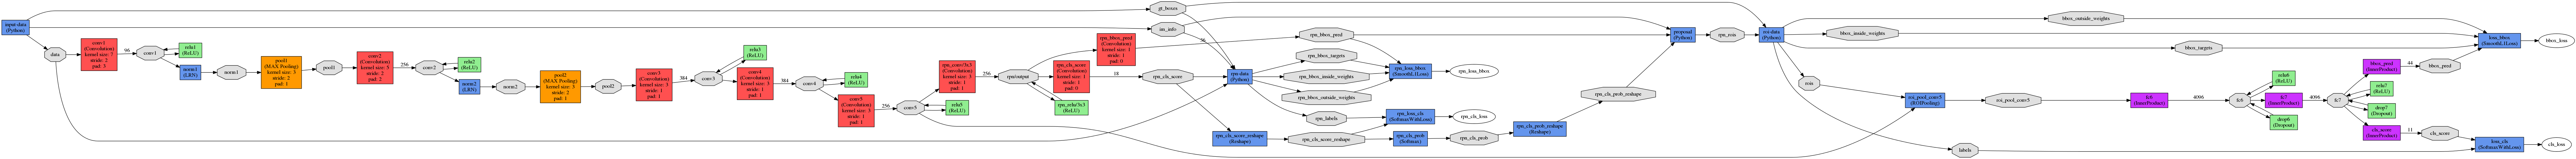

In [6]:
train_file = os.path.join(model_dir, 'train.prototxt')
test_file = os.path.join(model_dir, 'test.prototxt')
# Drawing the network doesn't seem to work with 'include' fields in a layer
network_im = draw_network(train_file, draw_to_file= False)
display(Image(network_im))

solver_file = os.path.join(model_dir, 'solver.prototxt')

In [7]:
def combined_roidb(imdb_names):
    def get_roidb(imdb_name):
        imdb = get_imdb(imdb_name)
        print 'Loaded dataset `{:s}` for training'.format(imdb.name)
        imdb.set_proposal_method(cfg.TRAIN.PROPOSAL_METHOD)
        print 'Set proposal method: {:s}'.format(cfg.TRAIN.PROPOSAL_METHOD)
        roidb = get_training_roidb(imdb)
        return roidb

    roidbs = [get_roidb(s) for s in imdb_names.split('+')]
    roidb = roidbs[0]
    if len(roidbs) > 1:
        for r in roidbs[1:]:
            roidb.extend(r)
        imdb = datasets.imdb.imdb(imdb_names)
    else:
        imdb = get_imdb(imdb_names)
    return imdb, roidb

In [8]:
cfg_from_file('../experiments/cfgs/faster_rcnn_end2end_dstl.yml')
print('Using config:')
pprint.pprint(cfg)
np.random.seed(cfg.RNG_SEED)
caffe.set_random_seed(cfg.RNG_SEED)
imdb, roidb = combined_roidb('dstl_train')
output_dir = get_output_dir(imdb)
print output_dir

Using config:
{'DATA_DIR': '/data',
 'DEDUP_BOXES': 0.0625,
 'EPS': 1e-14,
 'EXP_DIR': 'faster_rcnn_end2end',
 'GPU_ID': 0,
 'MATLAB': 'matlab',
 'MODELS_DIR': '/home/ubuntu/src/py-faster-rcnn/models/pascal_voc',
 'PIXEL_MEANS': array([[[ 102.9801,  115.9465,  122.7717]]]),
 'RNG_SEED': 3,
 'ROOT_DIR': '/home/ubuntu/src/py-faster-rcnn',
 'TEST': {'BBOX_REG': True,
          'HAS_RPN': True,
          'MAX_SIZE': 1000,
          'NMS': 0.3,
          'PROPOSAL_METHOD': 'selective_search',
          'RPN_MIN_SIZE': 16,
          'RPN_NMS_THRESH': 0.7,
          'RPN_POST_NMS_TOP_N': 300,
          'RPN_PRE_NMS_TOP_N': 6000,
          'SCALES': [600],
          'SVM': False},
 'TRAIN': {'ASPECT_GROUPING': True,
           'BATCH_SIZE': 128,
           'BBOX_INSIDE_WEIGHTS': [1.0, 1.0, 1.0, 1.0],
           'BBOX_NORMALIZE_MEANS': [0.0, 0.0, 0.0, 0.0],
           'BBOX_NORMALIZE_STDS': [0.1, 0.1, 0.2, 0.2],
           'BBOX_NORMALIZE_TARGETS': True,
           'BBOX_NORMALIZE_TARGETS_PRECO

In [ ]:
pretrained_caffemodel = '/home/ubuntu/src/py-faster-rcnn/data/imagenet_models/ZF.v2.caffemodel'
# pretrained_caffemodel = caffemodel
train_net(solver_file, roidb, output_dir,                                                                                        
          pretrained_model=pretrained_caffemodel,                                                                                
          max_iters=10000)     

Filtered 0 roidb entries: 40 -> 40
Computing bounding-box regression targets...
bbox target means:
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
[ 0.  0.  0.  0.]
bbox target stdevs:
[[ 0.1  0.1  0.2  0.2]
 [ 0.1  0.1  0.2  0.2]
 [ 0.1  0.1  0.2  0.2]
 [ 0.1  0.1  0.2  0.2]
 [ 0.1  0.1  0.2  0.2]
 [ 0.1  0.1  0.2  0.2]
 [ 0.1  0.1  0.2  0.2]
 [ 0.1  0.1  0.2  0.2]
 [ 0.1  0.1  0.2  0.2]
 [ 0.1  0.1  0.2  0.2]
 [ 0.1  0.1  0.2  0.2]]
[ 0.1  0.1  0.2  0.2]
Normalizing targets
done
RoiDataLayer: name_to_top: {'gt_boxes': 2, 'data': 0, 'im_info': 1}
Loading pretrained model weights from /home/ubuntu/src/py-faster-rcnn/data/imagenet_models/ZF.v2.caffemodel
Solving...
speed: 1.849s / iter
speed: 1.839s / iter


In [ ]:
caffemodel = '/home/ubuntu/src/py-faster-rcnn/output/faster_rcnn_end2end/dstl_train/zf_faster_rcnn_iter_1000.caffemodel'
# caffemodel = pretrained_caffemodel
net = caffe.Net(test_file, caffemodel, caffe.TEST)
net.name = os.path.splitext(os.path.basename(caffemodel))[0]

In [ ]:
imdb = get_imdb('dstl_test')
test_net(net, imdb, max_per_image=100, vis='store_true', thresh=0.9)

In [ ]:
list_imdbs()